# The geometry of regularization: ridge vs lasso regression

## Introduction

We have seen that for regression problems, as a way to decrease the variance, we introduced regularization to our algorithms. This consists essentially of a penalization on the size of the parameters, and can be done by introducing the norm of the parameters vector in the cost function that we are trying to minimize. Here we face the problem of choosing the appropriate norm to penalize the parameters with. It is a well known fact that all norms in $\mathbb{R}^n$ are equivalent, but this does not make the choice trivial, as will see, different norms yield different conceptual results. This fact depends merely on the geometry of the balls in $\mathbb{R}^n$, as we will observe.

From now on, we will suppose we count with a set of points $x^{(1)},\dots,x^{(m)}\in\mathbb{R}^n$ with responses $y^{(1)},\dots,y^{(m)}\in\mathbb{R}$. For the pictures, we will assume that $n=2$. We will abuse the notation assuming that the data points $x^{(k)}=(x^{(k)}_1,\dots,x^{(k)}_m)$ are augmented with an extra coordinate $x^{(k)}_0=1$, allowing us to write some expressions more compactly.

## Ridge regression

Let $\theta=(\theta_0,\dots,\theta_n)\in\mathbb{R}^{n+1}$ Recall that the cost function to minimize to find the ordinary least squares regression is given by

$$
J(\theta) = \dfrac{1}{m}\displaystyle\sum_{k=1}^m (y^{(k)}-\theta\cdot x^{(k)})^2,
$$

and the optimal parameters are given by

$$
\widehat\theta = \text{argmin } J(\theta).
$$

Ridge regression introduces an $\mathcal{L}^2$ norm penalization on the size of the coefficients $\theta_k$ for $k=1,\dots,n$. Note that we **do not** include the bias unit $\theta_0$, as modifying this coefficient has no impact in the sensitivity of the response with respect to the inputs $x^{(k)}$. The cost function for ridge regression is then

$$
J_{\text{ridge}}(\theta) = \dfrac{1}{m}\displaystyle\sum_{k=1}^m (y^{(k)}-\theta\cdot x^{(k)})^2 + \lambda\sum_{i=1}^n \theta_i^2
$$

where $\lambda$ is the **regularization parameter**. The optimal parameters are given by

$$
\widehat\theta_{\text{ridge}} = \text{argmin } J_{\text{ridge}}(\theta).
$$

The regularization parameter $\lambda$ controls how strongly we penalize the size of the coefficients (the large $\lambda$ is, the more regularized the system is, that is, the smaller the parameters are). Using the Lagrange multipliers, it is possible to prove that this optimization problem is equivalent to 

\begin{align*}
\begin{cases}
 \widehat \theta_{\text{ridge}} = \text{argmin }  J(\theta) \\
 \text{subject to } \displaystyle\sum_{i=1}^n \theta_i^2 \leq t
\end{cases}
\end{align*}

for some $t>0$, where $t$ is another **regularization parameter** controlling the penalization of the size of the coefficients (it has the opposite effect of $\lambda$: the smaller $t$ is, the more regularized the algorithm is).

## Lasso regression

For lasso regression, instead of an $\mathcal{L}^2$ norm penalization, we introduce an $\mathcal{L}^1$ penalization to the cost function of the OLS:

$$
J_{\text{lasso}}(\theta) = \dfrac{1}{m}\displaystyle\sum_{k=1}^m (y^{(k)}-\theta\cdot x^{(k)})^2 + \lambda\sum_{i=1}^n |\theta_i|.
$$

Here $\lambda$ is again a regularization parameter, controlling the strength of the regularization/shrinkage of the coefficients $\theta_1,\dots,\theta_n$. We define the lasso parameters then as

$$
\widehat \theta_{\text{lasso}} = \text{argmin } J_{\text{lasso}}(\theta).
$$

Alternatively, this can be formulated in the form of

\begin{align*}
\begin{cases}
\theta_{\text{lasso}} = \text{argmin } J(\theta)\\
\text{subject to } \displaystyle\sum_{i=1}^n |\theta_i| \leq t
\end{cases}
\end{align*}

for some $t>0$, where again, $t$ is another regularization parameter with the opposite effect as $\lambda$.


## Geometry of the balls

Both ridge and lasso regression can be seen as minimization problems for $J(\theta)$ restricting the parameters to the balls $B_1(0,t)$ and $B_2(0,t)$ (that is, with respect to the norms $\| \|_1$ and $\|\|_2$ respectively). It might seem that this should yield relatively similar results, as in both cases we *just* want the size of the coefficients to be small. But this is not the case. Let us have a look at the balls with respect to the different norms:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def norm1(x,y):
    return (np.abs(x)+np.abs(y))

def norm2(x,y):
    return (x*x+y*y)

We will suppose, for the sake of the pictures, that the minimum of $J(\theta)$ is achieved at $\theta = (2,2)$, and that the level curves of $J(\theta)$ are ellipses:

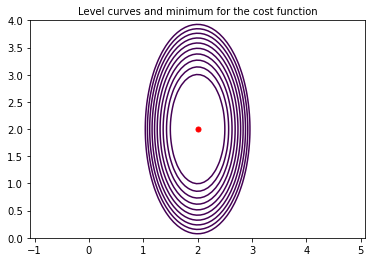

In [3]:
def ellipsis(x,y,h,k,a,b,c):
    return ( ((x-h)**2)/(a**2) + ((y-k)**2)/(b**2) -c )

xx=np.linspace(-4,10,200)
yy=np.linspace(-4,10,200)
[X,Y]=np.meshgrid(xx,yy)
E = []

plt.figure()
for k in range(10):
    E.append(ellipsis(X,Y,2,2,0.5,1,0.01 + k*0.3))
    plt.contour(X,Y,E[k],[1])

plt.plot(2, 2, marker='o', markersize=5, color="red")
plt.axis('equal')
plt.title('Level curves and minimum for the cost function', fontsize=10)
axes = plt.gca()
axes.set_xlim([0,4])
axes.set_ylim([0,4])
plt.show()

We have highlighted in red the point $\widehat\theta$ where the minimum is attained. Now, we will fix the regularization parameter $t$ equal to $1$. We plot now the corresponding balls $B_1(1)$ and $B_2(1)$:

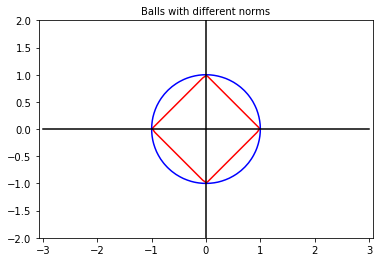

In [4]:
Z1 = norm1(X,Y)
Z2 = norm2(X,Y)

plt.figure()
plt.contour(X,Y,Z1,[1],colors='red')
plt.contour(X,Y,Z2,[1],colors='blue')
plt.axis('equal')
plt.title('Balls with different norms', fontsize=10)
s = np.linspace(-3, 3, 1000)
plt.plot(s, s*0,color='black')
plt.plot(s*0, s,color='black')
axes = plt.gca()
axes.set_xlim([-2,2])
axes.set_ylim([-2,2])
plt.show()

Now to solve the ridge and lasso optimization problems, we have to find the curve of the lowest level that intersects the respective balls. Graphically, this corresponds to finding the first intersection of the family of ellipses and the balls. Let us see what the situation looks like for the $\mathcal{L}^2$ penalization:

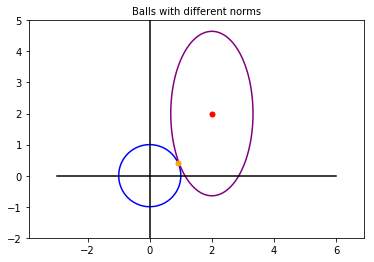

In [5]:
plt.figure()
plt.contour(X,Y,Z2,[1],colors='blue')
plt.contour(X,Y, ellipsis(X,Y,2,2,0.5,1,0.01 + 20*0.3),[1],colors='purple')
plt.axis('equal')
plt.title('Balls with different norms', fontsize=10)
axes = plt.gca()
axes.set_xlim([-2,5])
axes.set_ylim([-2,5])
s = np.linspace(-3, 6, 1000)
plt.plot(s, s*0,color='black')
plt.plot(s*0, s,color='black')
plt.plot(0.9, 0.4, marker='o', markersize=5, color="orange")
plt.plot(2, 2, marker='o', markersize=5, color="red")

plt.show()

We have highlighted in orange the point $\widehat\theta_{\text{ridge}}$ where the minimum is achieved, given the constrains of the ridge regression. Naturally, the coordinates of $\widehat\theta_\text{ridge}$ are smaller than the coordinates of $\widehat\theta$. We will see now what the situation looks like for the lasso regression:

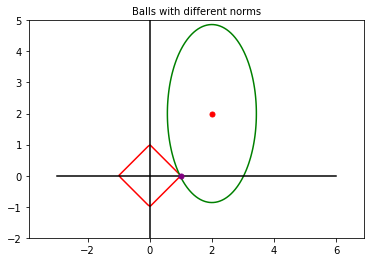

In [6]:
plt.figure()
plt.contour(X,Y,Z1,[1],colors='red')
plt.contour(X,Y, ellipsis(X,Y,2,2,0.5,1,0.01 + 24*0.3),[1],colors='green')
plt.axis('equal')
plt.title('Balls with different norms', fontsize=10)
axes = plt.gca()
axes.set_xlim([-2,5])
axes.set_ylim([-2,5])
s = np.linspace(-3, 6, 1000)
plt.plot(s, s*0,color='black')
plt.plot(s*0, s,color='black')
plt.plot(1, 0, marker='o', markersize=5, color="purple")
plt.plot(2, 2, marker='o', markersize=5, color="red")
plt.show()

As we can see, the intersection occurs at one of the corners of the ball. In fact, for a generic optimization, it is most likely that this will be the case. Even though the points $\theta_\text{ridge}$ and $\theta_\text{lasso}$ are *close*, $\theta_\text{lasso}$ has the interesting property that it sets some features equal to zero. In this sense, lasso regression is not only finding a predictor, but also performing automatic [feature selection](https://en.wikipedia.org/wiki/Feature_selection). This can serve analytical purposes, as it might give further insights on the model and the relation between the features and the responses. It is important to remark that this automatic process should always be contrasted with analysis performed by the analysts, as the algorithm does not have any additional information that the analyst may have.

We finish by remarking that the hyperparameters of the model (either $\lambda$ or $t$), need to be optimized via some cross validation method, and this might yield different conceptual results which might not be obvious when computing the scores associated to each choice of the hyperparameter. Thus, a more careful analysis is needed when dealing with regularized models.